<a href="https://colab.research.google.com/github/Harijeyan/Forage/blob/main/quantium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [388]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [389]:
transaction_data = pd.read_excel('/content/drive/MyDrive/Forage/Quantium_Retail_Strategy_Analytics/QVI_transaction_data.xlsx')
customer_data = pd.read_csv('/content/drive/MyDrive/Forage/Quantium_Retail_Strategy_Analytics/QVI_purchase_behaviour.csv')

In [390]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [391]:
transaction_data.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [392]:
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE']) + pd.to_timedelta(transaction_data['DATE'], unit='D')
transaction_data.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [393]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2088-10-18 00:00:00.000043390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2089-05-15 00:00:00.000043599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2089-05-21 00:00:00.000043605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2088-08-18 00:00:00.000043329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2088-08-19 00:00:00.000043330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [394]:
transaction_data['DATE'] = transaction_data['DATE'].dt.date
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2088-10-18,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2089-05-15,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2089-05-21,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2088-08-18,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2088-08-19,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2089-03-10,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2088-08-14,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2088-11-07,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2088-12-28,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


### Examine PROD_NAME column

*Summary of the dataset*

In [395]:
transaction_data.describe(include="all", datetime_is_numeric=True)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836,264836.000000,264836.000000
unique,364,NaN,NaN,NaN,NaN,114,NaN,NaN
top,2088-12-25,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,939,NaN,NaN,NaN,NaN,3304,NaN,NaN
mean,NaN,135.08011,1.355495e+05,1.351583e+05,56.583157,NaN,1.907309,7.304200
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,NaN,0.643654,3.083226
min,NaN,1.00000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.500000
25%,NaN,70.00000,7.002100e+04,6.760150e+04,28.000000,NaN,2.000000,5.400000
50%,NaN,130.00000,1.303575e+05,1.351375e+05,56.000000,NaN,2.000000,7.400000
75%,NaN,203.00000,2.030942e+05,2.027012e+05,85.000000,NaN,2.000000,9.200000


*Looks like we are definitely looking at potato chips but how can we check that
these are all chips? We can do some basic text analysis by summarising the
individual words in the product name*


> Examine the words in PROD_NAME to see if there are any incorrect entries such as products that are not chips



Start with formatting string with a single space between words (Kettle Tortilla ChpsHny&Jlpno Chili 150g -> Kettle Tortilla Chps Hny & Jlpno Chili 150g)

In [396]:
import re

# Function to insert space before a capital letter if it follows a lowercase letter and after a special character if it is followed by a letter without space

def insert_space(s):
    # Insert space between lowercase and uppercase
    s = re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', s)
    # Insert space around special characters if they are followed by a letter without space
    s = re.sub(r'(?<=[^A-Za-z0-9 ])(?=[A-Za-z])|(?<=[A-Za-z])(?=[^A-Za-z0-9 ])', ' ', s)
    # Insert space before numbers if they are preceded by a letter without space
    s = re.sub(r'(?<=[A-Za-z])(?=[0-9])', ' ', s)
    return s

# Apply the function to the 'PROD_NAME' column
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].apply(insert_space)
transaction_data.head(100)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2088-10-18,1,1000,1,5,Natural Chip Compny Sea Salt 175g,2,6.0
1,2089-05-15,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2089-05-21,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2088-08-18,2,2373,974,69,Smiths Chip Thinly S / Cream & Onion 175g,5,15.0
4,2088-08-19,2,2426,1038,108,Kettle Tortilla Chps Hny & Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
95,2089-05-16,125,125251,129302,36,Kettle Chilli 175g,1,5.4
96,2088-08-15,128,128148,131503,51,Doritos Mexicana 170g,1,4.4
97,2088-08-17,128,128231,132121,28,Thins Potato Chips Hot & Spicy 175g,1,3.3
98,2088-08-19,128,128231,132122,33,Cobs Popd Swt / Chlli & Sr / Cream Chips 110g,1,3.8


In [397]:
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2088-10-18,1,1000,1,5,Natural Chip Compny Sea Salt 175g,2,6.0
1,2089-05-15,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2089-05-21,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2088-08-18,2,2373,974,69,Smiths Chip Thinly S / Cream & Onion 175g,5,15.0
4,2088-08-19,2,2426,1038,108,Kettle Tortilla Chps Hny & Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2089-03-10,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2088-08-14,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2088-11-07,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2088-12-28,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [398]:
# Get the unique items in the 'PROD_NAME' column
unique_prod_names = transaction_data['PROD_NAME'].unique()

# Convert the array of unique items to a list
unique_prod_names_list = unique_prod_names.tolist()

# Display the list of unique product names
print(len(unique_prod_names_list))
unique_prod_names_list

114


['Natural Chip        Compny Sea Salt 175g',
 'CCs Nacho Cheese    175g',
 'Smiths Crinkle Cut  Chips Chicken 170g',
 'Smiths Chip Thinly  S / Cream & Onion 175g',
 'Kettle Tortilla Chps Hny & Jlpno Chili 150g',
 'Old El Paso Salsa   Dip Tomato Mild 300g',
 'Smiths Crinkle Chips Salt & Vinegar 330g',
 'Grain Waves         Sweet Chilli 210g',
 'Doritos Corn Chip Mexican Jalapeno 150g',
 'Grain Waves Sour    Cream & Chives 210G',
 'Kettle Sensations   Siracha Lime 150g',
 'Twisties Cheese     270g',
 'WW Crinkle Cut      Chicken 175g',
 'Thins Chips Light &  Tangy 175g',
 'CCs Original 175g',
 'Burger Rings 220g',
 'NCC Sour Cream &    Garden Chives 175g',
 'Doritos Corn Chip Southern Chicken 150g',
 'Cheezels Cheese Box 125g',
 'Smiths Crinkle      Original 330g',
 'Infzns Crn Crnchers Tangy Gcamole 110g',
 'Kettle Sea Salt     And Vinegar 175g',
 'Smiths Chip Thinly  Cut Original 175g',
 'Kettle Original 175g',
 'Red Rock Deli Thai  Chilli & Lime 150g',
 'Pringles Sthrn Fried Chicken 1

When analyzed the dataset the PROD_NAME column contains the words chips, chip, chp, chps which all represent chips at the end of the day. So let's make sure there's a consistency with the name 'chips' by replacing chip, chp and chps as 'chips'

In [399]:
# Dictionary of words to replace: keys are words to find, values are words to replace with
words_to_replace = {
    'chp': 'Chips',
    'chps': 'Chips',
    'chip': 'Chips',
    'Chp': 'Chips',
    'Chps': 'Chips',
    'Chip': 'Chips'
}

# Replace the words in the 'text_column' according to the dictionary
for word, new_word in words_to_replace.items():
    transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].str.replace(r'\b{}\b'.format(word), new_word, regex=True)

transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2088-10-18,1,1000,1,5,Natural Chips Compny Sea Salt 175g,2,6.0
1,2089-05-15,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2089-05-21,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2088-08-18,2,2373,974,69,Smiths Chips Thinly S / Cream & Onion 175g,5,15.0
4,2088-08-19,2,2426,1038,108,Kettle Tortilla Chips Hny & Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2089-03-10,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2088-08-14,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2088-11-07,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2088-12-28,272,272379,270188,42,Doritos Corn Chips Mexican Jalapeno 150g,2,7.8


In [400]:
# Get the unique items in the 'PROD_NAME' column
unique_prod_names = transaction_data['PROD_NAME'].unique()

# Convert the array of unique items to a list
unique_prod_names_list = unique_prod_names.tolist()

# Display the list of unique product names
print(len(unique_prod_names_list))
unique_prod_names_list

114


['Natural Chips        Compny Sea Salt 175g',
 'CCs Nacho Cheese    175g',
 'Smiths Crinkle Cut  Chips Chicken 170g',
 'Smiths Chips Thinly  S / Cream & Onion 175g',
 'Kettle Tortilla Chips Hny & Jlpno Chili 150g',
 'Old El Paso Salsa   Dip Tomato Mild 300g',
 'Smiths Crinkle Chips Salt & Vinegar 330g',
 'Grain Waves         Sweet Chilli 210g',
 'Doritos Corn Chips Mexican Jalapeno 150g',
 'Grain Waves Sour    Cream & Chives 210G',
 'Kettle Sensations   Siracha Lime 150g',
 'Twisties Cheese     270g',
 'WW Crinkle Cut      Chicken 175g',
 'Thins Chips Light &  Tangy 175g',
 'CCs Original 175g',
 'Burger Rings 220g',
 'NCC Sour Cream &    Garden Chives 175g',
 'Doritos Corn Chips Southern Chicken 150g',
 'Cheezels Cheese Box 125g',
 'Smiths Crinkle      Original 330g',
 'Infzns Crn Crnchers Tangy Gcamole 110g',
 'Kettle Sea Salt     And Vinegar 175g',
 'Smiths Chips Thinly  Cut Original 175g',
 'Kettle Original 175g',
 'Red Rock Deli Thai  Chilli & Lime 150g',
 'Pringles Sthrn Fried Chi

In [401]:
transaction_data_chips = transaction_data[~transaction_data['PROD_NAME'].str.contains('Salsa', case=False, na=False)]
transaction_data_chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2088-10-18,1,1000,1,5,Natural Chips Compny Sea Salt 175g,2,6.0
1,2089-05-15,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2089-05-21,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2088-08-18,2,2373,974,69,Smiths Chips Thinly S / Cream & Onion 175g,5,15.0
4,2088-08-19,2,2426,1038,108,Kettle Tortilla Chips Hny & Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2089-03-10,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2088-08-14,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2088-11-07,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2088-12-28,272,272379,270188,42,Doritos Corn Chips Mexican Jalapeno 150g,2,7.8


In [402]:
# # Remove rows where the 'PROD_NAME' column does not contain the word 'Chips'
# transactionData_filtered = transaction_data[transaction_data['PROD_NAME'].str.contains(r'\bChips\b', regex=True)]

# transactionData_filtered


In [403]:
# # Split the 'PROD_NAME' into individual words, flatten the list, and then get the unique words
# productWords = pd.DataFrame(
#     list(set(word for name in transaction_data['PROD_NAME'].unique() for word in name.split())),
#     columns=['words']
# )

# productWords


In [404]:
# # Filter out words that contain digits or special characters
# productWords_clean = productWords[~productWords['words'].str.contains(r'\d|[^\w\s]', regex=True)]

# productWords_clean

In [405]:
# # Count the number of appearances of each unique word in the 'PROD_NAME' column
# productWords_count = {word: transaction_data['PROD_NAME'].str.contains(r'\b' + word + r'\b', regex=True).sum() for word in productWords_clean['words']}

# # Convert the dictionary to a DataFrame
# productWords_count_df = pd.DataFrame(list(productWords_count.items()), columns=['Word', 'Count'])

# # Sort the DataFrame by 'Count' in descending order
# productWords_count_df_sorted = productWords_count_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

# productWords_count_df_sorted

In [406]:
transaction_data_chips.describe(include="all", datetime_is_numeric=True)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742,246742.000000,246742.000000
unique,364,NaN,NaN,NaN,NaN,105,NaN,NaN
top,2088-12-25,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,865,NaN,NaN,NaN,NaN,3304,NaN,NaN
mean,NaN,135.051098,1.355310e+05,1.351311e+05,56.351789,NaN,1.908062,7.321322
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,NaN,0.659831,3.077828
min,NaN,1.000000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.700000
25%,NaN,70.000000,7.001500e+04,6.756925e+04,26.000000,NaN,2.000000,5.800000
50%,NaN,130.000000,1.303670e+05,1.351830e+05,53.000000,NaN,2.000000,7.400000
75%,NaN,203.000000,2.030840e+05,2.026538e+05,87.000000,NaN,2.000000,8.800000


In [407]:
null_counts = transaction_data_chips.isnull().sum()
null_counts

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [408]:
transactionDataSorted = transaction_data_chips.sort_values(by='PROD_QTY', ascending=False)
transactionDataSorted

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69763,2089-05-21,226,226000,226210,4,Dorito Corn Chips Supreme 380g,200,650.0
69762,2088-08-20,226,226000,226201,4,Dorito Corn Chips Supreme 380g,200,650.0
135225,2089-05-16,46,46296,42138,81,Pringles Original Crisps 134g,5,18.5
69523,2089-05-16,71,71142,69852,96,WW Original Stacked Chips 160g,5,9.5
69502,2088-08-19,55,55144,49328,44,Thins Chips Light & Tangy 175g,5,16.5
...,...,...,...,...,...,...,...,...
150883,2088-08-15,184,184055,186586,107,Smiths Crinkle Cut French Onion Dip 150g,1,2.6
150885,2089-05-18,184,184152,187227,28,Thins Potato Chips Hot & Spicy 175g,1,3.3
29682,2088-12-05,174,174004,174974,114,Kettle Sensations Siracha Lime 150g,1,4.6
150887,2089-05-18,184,184205,187584,13,Red Rock Deli Thai Chilli & Lime 150g,1,2.7


In [409]:
customer_data

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [410]:
customer_data = customer_data[customer_data['LYLTY_CARD_NBR'] != 226000]
customer_data

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [411]:
customer_226000 = customer_data[customer_data['LYLTY_CARD_NBR'] == 226000]

customer_226000.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER


In [412]:
#Remove outlier customer transcation

transactionData_filtered = transaction_data_chips[transaction_data_chips['LYLTY_CARD_NBR'] != 226000]
transactionData_filtered

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2088-10-18,1,1000,1,5,Natural Chips Compny Sea Salt 175g,2,6.0
1,2089-05-15,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2089-05-21,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2088-08-18,2,2373,974,69,Smiths Chips Thinly S / Cream & Onion 175g,5,15.0
4,2088-08-19,2,2426,1038,108,Kettle Tortilla Chips Hny & Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2089-03-10,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2088-08-14,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2088-11-07,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2088-12-28,272,272379,270188,42,Doritos Corn Chips Mexican Jalapeno 150g,2,7.8


In [413]:
transactionData_filtered = transactionData_filtered.sort_values(by='DATE', ascending=True)
transactionData_filtered

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
9161,2088-07-02,88,88140,86914,25,Pringles Sour Cream Onion 134g,2,7.4
155442,2088-07-02,60,60276,57330,3,Kettle Sensations Camembert & Fig 150g,2,9.2
181349,2088-07-02,199,199014,197623,104,Infuzions Thai Sweet Chili Potato Mix 110g,2,7.6
229948,2088-07-02,35,35052,31630,11,RRD Pc Sea Salt 165g,1,3.0
104647,2088-07-02,72,72104,71038,20,Doritos Cheese Supreme 330g,2,11.4
...,...,...,...,...,...,...,...,...
10254,2089-07-01,112,112141,114611,98,NCC Sour Cream & Garden Chives 175g,2,6.0
113220,2089-07-01,207,207155,205513,99,Pringles Sthrn Fried Chicken 134g,2,7.4
229182,2089-07-01,10,10140,9882,12,Natural Chips Co Tmato Hrb & Spce 175g,2,6.0
229015,2089-07-01,6,6258,6047,29,French Fries Potato Chips 175g,1,3.0


In [414]:
#Count the number of transactions by date

transactions_by_date = transactionData_filtered['DATE'].value_counts().sort_index()

transactions_by_date

2088-07-02    663
2088-07-03    650
2088-07-04    674
2088-07-05    669
2088-07-06    660
             ... 
2089-06-27    657
2089-06-28    669
2089-06-29    673
2089-06-30    703
2089-07-01    704
Name: DATE, Length: 364, dtype: int64

In [415]:
transactions_by_date.describe()

count    364.000000
mean     677.857143
std       33.687536
min      607.000000
25%      658.000000
50%      674.000000
75%      694.250000
max      865.000000
Name: DATE, dtype: float64

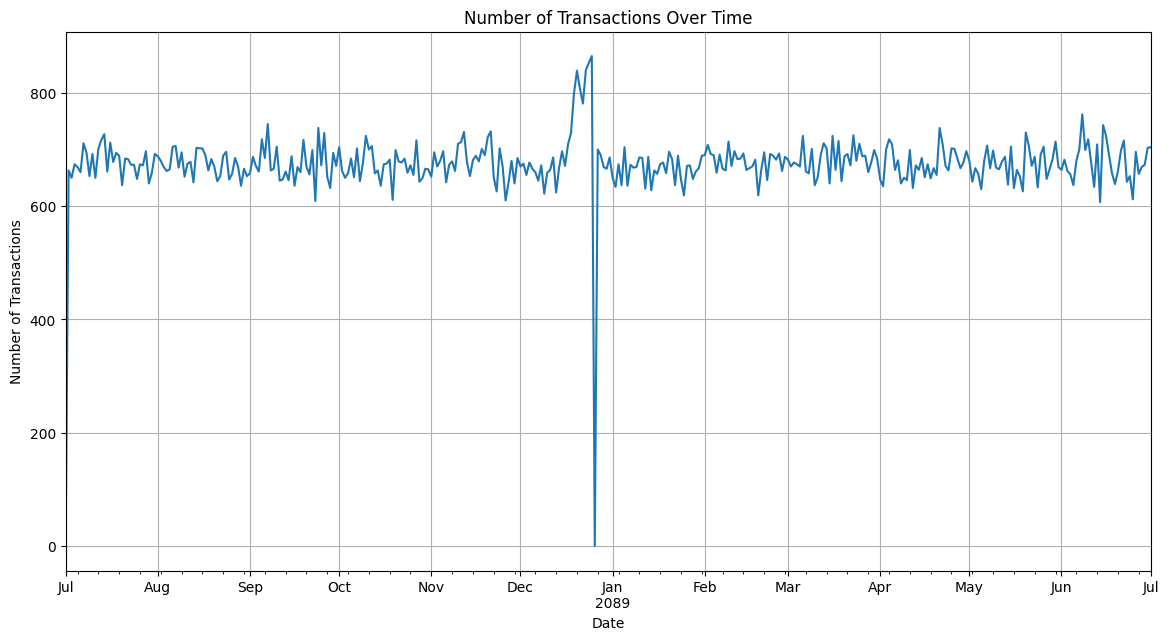

In [416]:
# There's only 364 rows, meaning only 364 dates which indicates a missing date.
# Let's create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a
# chart of number of transactions over time to find the missing date.

import matplotlib.pyplot as plt

# Create a date range from 1 Jul 2018 to 30 Jun 2019
date_range = pd.date_range(start='2088-07-01', end='2089-07-01')

# Count the number of transactions for each date in the DataFrame
transactions_by_date = transactionData_filtered['DATE'].value_counts().sort_index()

# Reindex the transactions_by_date with the full date range to include missing dates
transactions_by_date = transactions_by_date.reindex(date_range, fill_value=0)

# Plot the number of transactions over time
plt.figure(figsize=(14, 7))
transactions_by_date.plot(title='Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

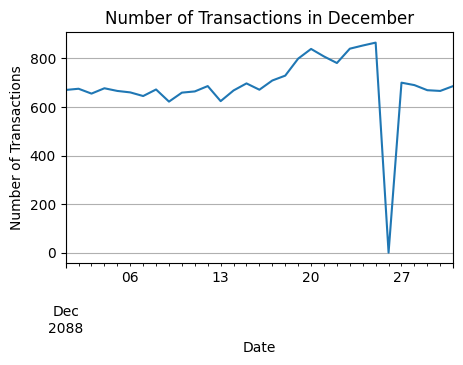

In [417]:
# Create a date range from 1 Jul 2018 to 30 Jun 2019
date_range = pd.date_range(start='2088-07-01', end='2089-07-01')

# Count the number of transactions for each date in the DataFrame
transactions_by_date = transactionData_filtered['DATE'].value_counts().sort_index()

# Reindex the transactions_by_date with the full date range to include missing dates
transactions_by_date = transactions_by_date.reindex(date_range, fill_value=0)

# Filter the transactions_by_date to focus on December only
transactions_in_december = transactions_by_date[transactions_by_date.index.month == 12]

# Plot the number of transactions in December
plt.figure(figsize=(5, 3))
transactions_in_december.plot(title='Number of Transactions in December')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.


### Create Pack Size

In [418]:
transactionData_filtered

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
9161,2088-07-02,88,88140,86914,25,Pringles Sour Cream Onion 134g,2,7.4
155442,2088-07-02,60,60276,57330,3,Kettle Sensations Camembert & Fig 150g,2,9.2
181349,2088-07-02,199,199014,197623,104,Infuzions Thai Sweet Chili Potato Mix 110g,2,7.6
229948,2088-07-02,35,35052,31630,11,RRD Pc Sea Salt 165g,1,3.0
104647,2088-07-02,72,72104,71038,20,Doritos Cheese Supreme 330g,2,11.4
...,...,...,...,...,...,...,...,...
10254,2089-07-01,112,112141,114611,98,NCC Sour Cream & Garden Chives 175g,2,6.0
113220,2089-07-01,207,207155,205513,99,Pringles Sthrn Fried Chicken 134g,2,7.4
229182,2089-07-01,10,10140,9882,12,Natural Chips Co Tmato Hrb & Spce 175g,2,6.0
229015,2089-07-01,6,6258,6047,29,French Fries Potato Chips 175g,1,3.0


In [419]:
# Export DataFrame to a CSV file
#transactionData_filtered.to_csv('/content/drive/MyDrive/Forage/Quantium_Retail_Strategy_Analytics/transactionData_filteredV2.csv', index=False)

# index=False to exclude row indices from the CSV file

In [420]:
# # We can work this out by taking the digits that are in PROD_NAME

# # Define a function to extract pack size and clean product name
# def extract_pack_size_and_clean_name(prod_name):
#     # Find all numbers followed by 'g' (which indicates grams)
#     pack_size = re.search(r'(\d+)(g)', prod_name)
#     if pack_size:
#         # Extract the pack size (number only, without 'g')
#         size = pack_size.group(1)
#         # Remove the pack size from the product name
#         cleaned_name = prod_name.replace(pack_size.group(0), '').strip()
#         return cleaned_name, int(size)
#     else:
#         return prod_name, None

# # Apply the function and create new columns for the cleaned name and pack size
# transactionData_filtered[['CLEANED_PROD_NAME', 'PACK_SIZE(g)']] = transactionData_filtered['PROD_NAME'].apply(
#     lambda x: pd.Series(extract_pack_size_and_clean_name(x))
# )

# # Display the DataFrame with the new columns
# transactionData_filtered[['PROD_NAME', 'CLEANED_PROD_NAME', 'PACK_SIZE(g)']].head()

In [421]:
# We can work this out by taking the digits that are in PROD_NAME

# Define a function to extract pack size and clean product name
def extract_pack_size_and_clean_name(prod_name):
    # Find all numbers followed by 'g' or 'G' (which indicates grams)
    pack_size = re.search(r'(\d+)([gG])', prod_name)
    if pack_size:
        # Extract the pack size (number only, without 'g' or 'G')
        size = pack_size.group(1)
        # Remove the pack size from the product name
        cleaned_name = prod_name.replace(pack_size.group(0), '').strip()
        return cleaned_name, int(size)
    else:
        return prod_name, None

# Apply the function and create new columns for the cleaned name and pack size
transactionData_filtered[['CLEANED_PROD_NAME', 'PACK_SIZE(g)']] = transactionData_filtered['PROD_NAME'].apply(
    lambda x: pd.Series(extract_pack_size_and_clean_name(x))
)

# Display the DataFrame with the new columns
transactionData_filtered[['PROD_NAME', 'CLEANED_PROD_NAME', 'PACK_SIZE(g)']].head()

,PROD_NAME,CLEANED_PROD_NAME,PACK_SIZE(g)
9161,Pringles Sour Cream Onion 134g,Pringles Sour Cream Onion,134
155442,Kettle Sensations Camembert & Fig 150g,Kettle Sensations Camembert & Fig,150
181349,Infuzions Thai Sweet Chili Potato Mix 110g,Infuzions Thai Sweet Chili Potato Mix,110
229948,RRD Pc Sea Salt 165g,RRD Pc Sea Salt,165
104647,Doritos Cheese Supreme 330g,Doritos Cheese Supreme,330


In [422]:
transactionData_filtered[['PROD_NAME', 'CLEANED_PROD_NAME', 'PACK_SIZE(g)']].describe()

,PACK_SIZE(g)
count,246740.000000
mean,175.583521
std,59.432118
min,70.000000
25%,150.000000
50%,170.000000
75%,175.000000
max,380.000000


In [423]:
transactionData_filtered = transactionData_filtered.sort_values(by='PACK_SIZE(g)', ascending=True)
transactionData_filtered

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,CLEANED_PROD_NAME,PACK_SIZE(g)
92717,2088-10-08,172,172099,173345,38,Infuzions Mango Chutny Papadums 70g,2,4.8,Infuzions Mango Chutny Papadums,70
55240,2088-08-16,28,28194,25680,38,Infuzions Mango Chutny Papadums 70g,3,7.2,Infuzions Mango Chutny Papadums,70
100232,2088-07-17,5,5211,5616,38,Infuzions Mango Chutny Papadums 70g,2,4.8,Infuzions Mango Chutny Papadums,70
2567,2089-06-23,129,129184,133337,38,Infuzions Mango Chutny Papadums 70g,2,4.8,Infuzions Mango Chutny Papadums,70
221062,2089-05-07,97,97099,96915,38,Infuzions Mango Chutny Papadums 70g,2,4.8,Infuzions Mango Chutny Papadums,70
...,...,...,...,...,...,...,...,...,...,...
227626,2089-05-27,245,245111,247519,4,Dorito Corn Chips Supreme 380g,2,13.0,Dorito Corn Chips Supreme,380
213228,2089-04-20,190,190060,190604,14,Smiths Crnkle Chips Orgnl Big Bag 380g,2,11.8,Smiths Crnkle Chips Orgnl Big Bag,380
85837,2089-06-08,71,71047,69214,4,Dorito Corn Chips Supreme 380g,2,13.0,Dorito Corn Chips Supreme,380
174920,2089-06-08,59,59260,55647,14,Smiths Crnkle Chips Orgnl Big Bag 380g,2,11.8,Smiths Crnkle Chips Orgnl Big Bag,380


In [424]:
# Remove the 'PROD_NAME' column from the DataFrame
transactionData_filtered = transactionData_filtered.drop(columns=['PROD_NAME'])

# Rearrange the order of the remaining columns as desired
transactionData_filtered = transactionData_filtered[['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'CLEANED_PROD_NAME', 'PACK_SIZE(g)', 'PROD_QTY', 'TOT_SALES']]

# Now 'df' will have the 'PROD_NAME' column removed and the other columns rearranged.
transactionData_filtered

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,CLEANED_PROD_NAME,PACK_SIZE(g),PROD_QTY,TOT_SALES
92717,2088-10-08,172,172099,173345,38,Infuzions Mango Chutny Papadums,70,2,4.8
55240,2088-08-16,28,28194,25680,38,Infuzions Mango Chutny Papadums,70,3,7.2
100232,2088-07-17,5,5211,5616,38,Infuzions Mango Chutny Papadums,70,2,4.8
2567,2089-06-23,129,129184,133337,38,Infuzions Mango Chutny Papadums,70,2,4.8
221062,2089-05-07,97,97099,96915,38,Infuzions Mango Chutny Papadums,70,2,4.8
...,...,...,...,...,...,...,...,...,...
227626,2089-05-27,245,245111,247519,4,Dorito Corn Chips Supreme,380,2,13.0
213228,2089-04-20,190,190060,190604,14,Smiths Crnkle Chips Orgnl Big Bag,380,2,11.8
85837,2089-06-08,71,71047,69214,4,Dorito Corn Chips Supreme,380,2,13.0
174920,2089-06-08,59,59260,55647,14,Smiths Crnkle Chips Orgnl Big Bag,380,2,11.8


In [425]:
null_counts = transactionData_filtered.isnull().sum()
null_counts

DATE                 0
STORE_NBR            0
LYLTY_CARD_NBR       0
TXN_ID               0
PROD_NBR             0
CLEANED_PROD_NAME    0
PACK_SIZE(g)         0
PROD_QTY             0
TOT_SALES            0
dtype: int64

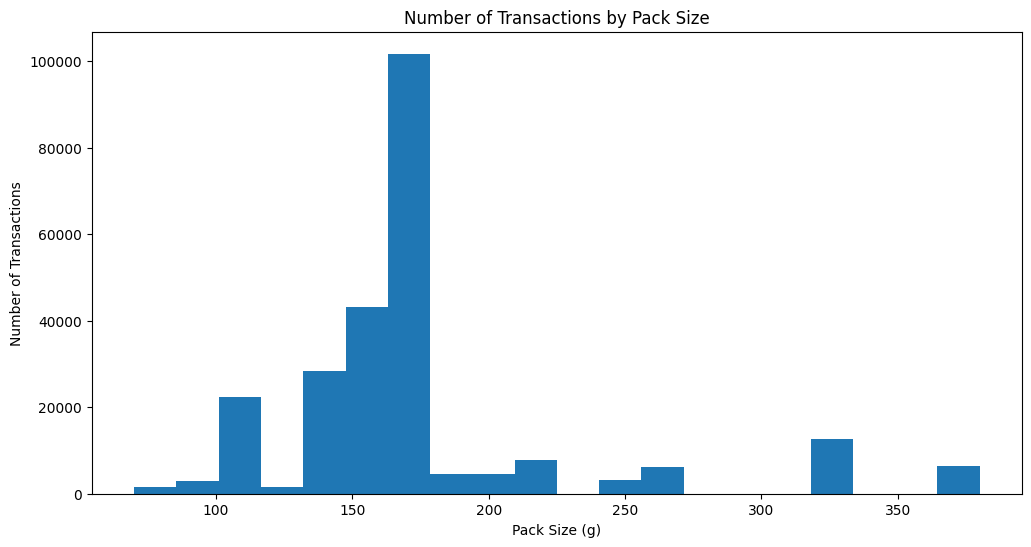

In [426]:
# Plot a histogram showing the number of transactions by pack size
plt.figure(figsize=(12, 6))
transactionData_filtered['PACK_SIZE(g)'].hist(bins=len(transactionData_filtered['PACK_SIZE(g)'].unique()))
plt.title('Number of Transactions by Pack Size')
plt.xlabel('Pack Size (g)')
plt.ylabel('Number of Transactions')
plt.grid(False)  # Turn off the grid for histograms
plt.show()

Create a column which contains the brand of the product, by
extracting it from the product name

In [427]:
# Define a function to extract the brand name from the product name
def extract_brand(prod_name):
    # the brand name is the first word in the product name
    return prod_name.split()[0]

# Apply the function to the 'PROD_NAME' column to create a new 'Brand' column
transactionData_filtered['Brand'] = transactionData_filtered['CLEANED_PROD_NAME'].apply(extract_brand)

# Display the DataFrame with the new 'Brand' column
transactionData_filtered[['CLEANED_PROD_NAME', 'Brand']]

,CLEANED_PROD_NAME,Brand
92717,Infuzions Mango Chutny Papadums,Infuzions
55240,Infuzions Mango Chutny Papadums,Infuzions
100232,Infuzions Mango Chutny Papadums,Infuzions
2567,Infuzions Mango Chutny Papadums,Infuzions
221062,Infuzions Mango Chutny Papadums,Infuzions
...,...,...
227626,Dorito Corn Chips Supreme,Dorito
213228,Smiths Crnkle Chips Orgnl Big Bag,Smiths
85837,Dorito Corn Chips Supreme,Dorito
174920,Smiths Crnkle Chips Orgnl Big Bag,Smiths


In [435]:
# Get the unique brands
unique_brands = transactionData_filtered['Brand'].unique()

# Convert the array of unique brands to a list
unique_brands_list = unique_brands.tolist()

# Display the list of unique brands
print(len(unique_brands_list))
unique_brands_list.sort()
unique_brands_list

28


['Burger',
 'CCs',
 'Cheetos',
 'Cheezels',
 'Cobs',
 'Dorito',
 'Doritos',
 'French',
 'Grain',
 'Grn',
 'Infuzions',
 'Infzns',
 'Kettle',
 'NCC',
 'Natural',
 'Pringles',
 'RRD',
 'Red',
 'Smith',
 'Smiths',
 'Snbts',
 'Sunbites',
 'Thins',
 'Tostitos',
 'Twisties',
 'Tyrrells',
 'WW',
 'Woolworths']

In [441]:
# Dictionary of words to replace: keys are words to find, values are words to replace with
brand_words_to_replace = {
    'RRD': 'Red',
    'Dorito': 'Doritos',
    'Grn': 'Grain',
    'Infzns': 'Infuzions',
    'Smith': 'Smiths',
    'Snbts': 'Sunbites',
    'WW': 'Woolworths'
}

# Replace the words in the 'CLEANED_PROD_NAME' column according to the dictionary
for word, new_word in brand_words_to_replace.items():
    escaped_word = re.escape(word)  # Escape to handle any special regex characters in 'word'
    transactionData_filtered['CLEANED_PROD_NAME'] = transactionData_filtered['CLEANED_PROD_NAME'].str.replace(r'\b{}\b'.format(escaped_word), new_word, regex=True)
    transactionData_filtered['Brand'] = transactionData_filtered['Brand'].str.replace(r'\b{}\b'.format(escaped_word), new_word, regex=True)

# Display the DataFrame to verify the changes
transactionData_filtered


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,CLEANED_PROD_NAME,PACK_SIZE(g),PROD_QTY,TOT_SALES,Brand
92717,2088-10-08,172,172099,173345,38,Infuzions Mango Chutny Papadums,70,2,4.8,Infuzions
55240,2088-08-16,28,28194,25680,38,Infuzions Mango Chutny Papadums,70,3,7.2,Infuzions
100232,2088-07-17,5,5211,5616,38,Infuzions Mango Chutny Papadums,70,2,4.8,Infuzions
2567,2089-06-23,129,129184,133337,38,Infuzions Mango Chutny Papadums,70,2,4.8,Infuzions
221062,2089-05-07,97,97099,96915,38,Infuzions Mango Chutny Papadums,70,2,4.8,Infuzions
...,...,...,...,...,...,...,...,...,...,...
227626,2089-05-27,245,245111,247519,4,Doritos Corn Chips Supreme,380,2,13.0,Doritos
213228,2089-04-20,190,190060,190604,14,Smiths Crnkle Chips Orgnl Big Bag,380,2,11.8,Smiths
85837,2089-06-08,71,71047,69214,4,Doritos Corn Chips Supreme,380,2,13.0,Doritos
174920,2089-06-08,59,59260,55647,14,Smiths Crnkle Chips Orgnl Big Bag,380,2,11.8,Smiths


In [442]:
# Get the unique brands
unique_brands_2 = transactionData_filtered['Brand'].unique()

# Convert the array of unique brands to a list
unique_brands_list_2 = unique_brands_2.tolist()

# Display the list of unique brands
print(len(unique_brands_list_2))
unique_brands_list_2.sort()
unique_brands_list_2

21


['Burger',
 'CCs',
 'Cheetos',
 'Cheezels',
 'Cobs',
 'Doritos',
 'French',
 'Grain',
 'Infuzions',
 'Kettle',
 'NCC',
 'Natural',
 'Pringles',
 'Red',
 'Smiths',
 'Sunbites',
 'Thins',
 'Tostitos',
 'Twisties',
 'Tyrrells',
 'Woolworths']

In [443]:
customer_data

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [444]:
customer_data.describe(include="all", datetime_is_numeric=True)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,7.263600e+04,72636,72636
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361847e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620175e+04,NaN,NaN
50%,1.340395e+05,NaN,NaN
75%,2.033742e+05,NaN,NaN


In [447]:
# 'LYLTY_CARD_NBR' is the common column in both DataFrames used for merging.

# Merge transaction data with customer data on 'LYLTY_CARD_NBR'
merged_data = pd.merge(transactionData_filtered, customer_data, on='LYLTY_CARD_NBR')

# Display the first few rows of the merged DataFrame
merged_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,CLEANED_PROD_NAME,PACK_SIZE(g),PROD_QTY,TOT_SALES,Brand,LIFESTAGE,PREMIUM_CUSTOMER
0,2088-10-08,172,172099,173345,38,Infuzions Mango Chutny Papadums,70,2,4.8,Infuzions,OLDER SINGLES/COUPLES,Budget
1,2088-08-15,172,172099,173343,86,Cheetos Puffs,165,3,8.4,Cheetos,OLDER SINGLES/COUPLES,Budget
2,2088-12-17,172,172099,173346,92,Woolworths Crinkle Cut Chicken,175,2,3.4,Woolworths,OLDER SINGLES/COUPLES,Budget
3,2088-08-17,172,172099,173344,14,Smiths Crnkle Chips Orgnl Big Bag,380,2,11.8,Smiths,OLDER SINGLES/COUPLES,Budget
4,2089-02-01,172,172099,173347,14,Smiths Crnkle Chips Orgnl Big Bag,380,2,11.8,Smiths,OLDER SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2088-08-13,154,154343,154854,14,Smiths Crnkle Chips Orgnl Big Bag,380,2,11.8,Smiths,RETIREES,Budget
246736,2088-08-13,228,228188,230109,4,Doritos Corn Chips Supreme,380,2,13.0,Doritos,YOUNG SINGLES/COUPLES,Mainstream
246737,2088-11-10,2,2032,625,4,Doritos Corn Chips Supreme,380,1,6.5,Doritos,YOUNG SINGLES/COUPLES,Mainstream
246738,2088-11-10,25,25052,21723,14,Smiths Crnkle Chips Orgnl Big Bag,380,2,11.8,Smiths,RETIREES,Mainstream


In [448]:
null_counts_v2 = merged_data.isnull().sum()
null_counts_v2

DATE                 0
STORE_NBR            0
LYLTY_CARD_NBR       0
TXN_ID               0
PROD_NBR             0
CLEANED_PROD_NAME    0
PACK_SIZE(g)         0
PROD_QTY             0
TOT_SALES            0
Brand                0
LIFESTAGE            0
PREMIUM_CUSTOMER     0
dtype: int64